In [71]:
import osmnx as ox
ox.config(log_file=True, log_console=True, use_cache=True)
ox.__version__

import networkx as nx

import pandas as pd
from pandas import DataFrame

import pandana, matplotlib.pyplot as plt
%matplotlib inline
from pandana.loaders import osm

from shapely.geometry import Point

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import xlsxwriter
import openpyxl
import osmnx as ox
ox.config(log_file=True, log_console=True, use_cache=True)
ox.__version__

import momepy

In [174]:
#####Plaza Luceros: 38.3459813, -0.49069405　(38.34643148517816, 38.34688167031629, 38.34778204047261, 38.34868241046897, 38.35048314998173, 38.35498499596392, 38.359486837946314)
#####Plaza Gabriel Miró:  38.343352, -0.484987 (38.343802183407995,38.344252366775976,38.34515273339189, 38.34605309984774, 38.34785383227921, 38.352355660556626, 38.35685748483198)
#####Plaza de San Cristobal: 38.346731, -0.483661(38.34718118268919, 38.347631365338344, 38.3485317305166, 38.34943209553474, 38.35123282509076, 38.355734646178995, 38.360236463264435) 

lat = 38.3459813
lon = -0.49069405
point = (lat, lon)
dist = 1500

##### lat & lon 
bbox = ox.bbox_from_point(point, distance = dist)
north, south, east, west = ox.bbox_from_point(point, dist, project_utm=False) #If lat & lon are desired : project_utm=Fale
north, south, east, west

(38.359486837946314,
 38.33247572606046,
 -0.47354494506856737,
 -0.5078434670348404)

In [258]:
nearest_id = ox.get_nearest_node(G_walk, (lat, lon), method='haversine', return_dist=True)
nearest_id

(544435729, 27.94968135100191)

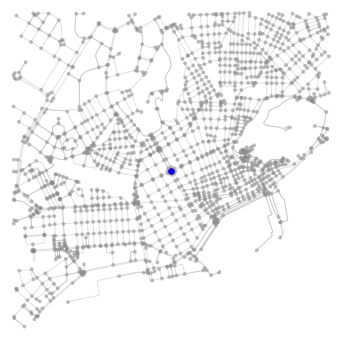

3072

In [175]:
G_walk = ox.graph_from_point(point, distance=dist, infrastructure='way["highway"~"primary|secondary|tertiary|residential|pedestrian|steps"]')
                            #6: steps
                            #25: pedestrian
                            #604: footway
                            #862 : residential
                            #1316: primary|secondary|tertiary|residential
                            #1536: primary|secondary|tertiary|residential|pedestrian
                            #1606: primary|secondary|tertiary|residential|pedestrian|steps 
                            #1015 : residential|tertiary
                            #1153 : residential|primary
                            #1239 : residential|tertiary|primary
                            #1214 : residential|cycleway
                            #136 : primary|cycleway
                            #2817 : residential|pedestrian|footway|steps|track|corridor|cycleway
                            #2546 : tertiary|residential|pedestrian|footway|steps
                            #NO DATA: sidewalk|path|living_street|birdleway|corridor|road
#                             network_type = networkType)
fig, ax = ox.plot_graph(G_walk, show= False,node_color='grey', node_alpha=0.5, edge_alpha= 0.3,close=False) #Switch off "show" first before plotting the red node
ax.scatter(-0.49069405,38.3459813,s=30, c='red') 
ax.scatter(lon, lat,s=30, c='blue') 
# ax.scatter(-0.49069405, 38.34643148517816,s=30, c='#2b580c') 
# ax.scatter(-0.49069405, 338.34688167031629,s=30, c='blue') 
# ax.scatter(-0.49069405, 38.34778204047261,s=30, c='purple') 
# ax.scatter(-0.49069405, 38.34868241046897,s=30, c='green') 
# ax.scatter(-0.49069405, 38.35048314998173,s=30, c='pink') 
# ax.scatter(-0.49069405, 38.35498499596392,s=30, c='orange') 
# ax.scatter(-0.49069405, 38.359486837946314,s=30, c='grey') 
#####nearest node: (-0.4902473,38.3459893), 
# '#9dab86'
plt.show()

gdf_nodes, gdf_edges = ox.graph_to_gdfs(G_walk)
len(gdf_nodes)
len(gdf_edges)

In [55]:
#####1. Save GRAPH to SHAPEFILES for Netlogo: https://notebooks.azure.com/bradcavanagh/projects/osmnx-examples/html/notebooks/05-example-save-load-networks-shapes.ipynb
G_projected = ox.project_graph(G_walk)
# ox.plot_graph(G_projected)
ox.save_graph_shapefile(G_projected, filename='E:/Walkability around bus stops/for_netlogo')

In [56]:
#####2. Save GRAPH to graphml file
ox.save_graphml(G_projected, filename='E:/Walkability around bus stops/network.graphml')

In [53]:
#####3. Save GDF to SHAPEFILES

ox.save_gdf_shapefile(gdf_nodes, filename='E:/Walkability around bus stops/for_netlogo_node')

# G_Ali = ox.gdf_from_place('Alicante', gdf_name=None, which_result=1, buffer_dist=None)
# ox.save_gdf_shapefile(G_Ali, filename='E:/Walkability around bus stops/for_netlogo_gdf')

In [64]:
#####4. Save graph to GDF ==>DOESN'T WORK
G_gdf = ox.graph_to_gdfs(G_walk, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)
G_gdf
import fiona; fiona.supported_drivers
# ox.save_gdf(G_gdf, filename='E:/Walkability around bus stops/nw_gdf.gdf')
# G_gdf.to_file('E:/Walkability around bus stops/network.gdf')

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'rw',
 'GML': 'raw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r',
 'TopoJSON': 'r'}

In [34]:
#####5. Save graph to OSM
ox.save_graph_osm(G_walk,
               node_tags=['highway'], 
               node_attrs=['id', 'timestamp', 'uid', 'user', 'version', 'changeset', 'lat', 'lon'], 
               edge_tags=['highway', 'lanes', 'maxspeed', 'name', 'oneway'], 
               edge_attrs=['id', 'timestamp', 'uid', 'user', 'version', 'changeset'], 
               oneway=False, 
              filename='E:/Walkability around bus stops/for_netlogo_osm')

In [263]:
#####Fine the lat and lon of each node
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G_walk)
gdf_nodes  

df_G_walk = pd.DataFrame.from_dict(gdf_nodes)
writer = pd.ExcelWriter('D:/Thesis/plaza1_Luceros/centerPoint_placementEffect/networkType_selectedHighway/center point moves to north/node_latlon/Luceros_n1500m_selectedHighway_1500m_latlon.xlsx', engine='xlsxwriter')
df_G_walk.to_excel(writer, sheet_name='Sheet1', startcol=0, startrow=0,header = True, index = True )
writer.save()

In [264]:
networkType = 'walk'

G_walk = ox.graph_from_point(point, distance=dist,infrastructure='way["highway"~"primary|secondary|tertiary|residential|pedestrian|steps"]')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0, show=False, close=False)
# fig, ax = ox.plot_graph(G_walk, show=False, close=False) #We’ll just take advantage of the show and close parameters in OSMnx to prevent it from finishing the Matplotlib operation and instead returning the unclosed fix and ax objects.

#####Covert stats results into dataframe and save as excel
statsBasicWalk = ox.stats.basic_stats(G_walk, area=dist*dist, clean_intersects=True, tolerance=15, circuity_dist='euclidean')
dfStatsBasicWalk = pd.DataFrame.from_dict(statsBasicWalk) 
statsExtendedWalk = ox.extended_stats(G_walk, connectivity=True, anc=False, ecc=False, bc=True, cc=True)
dfStatsExtendedWalk = pd.DataFrame.from_dict(statsExtendedWalk)

#####Create a dictionary combines basic and extended stats
# statsWalk = ox.basic_stats(G_walk, area=dist*dist, clean_intersects=True, tolerance=15, circuity_dist='euclidean')
# extendedStatsWalk = ox.extended_stats(G_walk,connectivity=True, anc=False, ecc=False, bc=True, cc=True)
# for key, value in extendedStatsWalk.items():
#     statsWalk[key] = value
# pd.Series(statsWalk)

#####Horizontal merge basic and extended stats of walk network
##### https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
dfStatsMergeWalk  = pd.merge(dfStatsBasicWalk,                  #data frame 1
                              dfStatsExtendedWalk,                   #data frame 2
                              left_on=None, #column in data frame 1
                              right_on=None,         #column in data frame 2
                              left_index=True, right_index=True, 
                              how='outer',              
                              sort=False)
#                             suffixes=['_from', '_to'])
dfStatsMergeWalk

,n,m,k_avg,intersection_count,streets_per_node_avg,streets_per_node_counts,streets_per_node_proportion,edge_length_total,edge_length_avg,street_length_total,...,pagerank_max_node,pagerank_max,pagerank_min_node,pagerank_min,node_connectivity,edge_connectivity,closeness_centrality,closeness_centrality_avg,betweenness_centrality,betweenness_centrality_avg
0,1919.0,3668.0,3.822824,1837.0,3.237103,0.0,0.000000,233555.662,63.673845,194701.221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1919.0,3668.0,3.822824,1837.0,3.237103,82.0,0.042731,233555.662,63.673845,194701.221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1919.0,3668.0,3.822824,1837.0,3.237103,12.0,0.006253,233555.662,63.673845,194701.221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1919.0,3668.0,3.822824,1837.0,3.237103,1210.0,0.630537,233555.662,63.673845,194701.221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1919.0,3668.0,3.822824,1837.0,3.237103,601.0,0.313184,233555.662,63.673845,194701.221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1919.0,3668.0,3.822824,1837.0,3.237103,12.0,0.006253,233555.662,63.673845,194701.221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1919.0,3668.0,3.822824,1837.0,3.237103,2.0,0.001042,233555.662,63.673845,194701.221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13843560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,244887604.0,0.001942,245776980.0,0.00008,1.0,1.0,0.000472,0.00048,0.015351,0.015748
212330954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,244887604.0,0.001942,245776980.0,0.00008,1.0,1.0,0.000435,0.00048,0.005767,0.015748
219235804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,244887604.0,0.001942,245776980.0,0.00008,1.0,1.0,0.000000,0.00048,0.000000,0.015748


In [265]:
writer = pd.ExcelWriter('D:/Thesis/plaza1_Luceros/centerPoint_placementEffect/networkType_selectedHighway/center point moves to north/Luceros_n1500m_selectedHighway_1500m.xlsx', engine='xlsxwriter')

dfStatsMergeWalk.to_excel(writer, sheet_name='Sheet1', startcol=0, startrow=0,header = True, index = True )
# df_stats_extended.to_excel(writer, sheet_name='Sheet1', startcol=22, startrow=0, header = True, index = True)

writer.save()

In [12]:
networkType = 'bike'

G_bike = ox.graph_from_point(point, distance=dist, network_type=networkType)
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0, show=False, close=False)
# fig, ax = ox.plot_graph(G_bike, show=False, close=False) #We’ll just take advantage of the show and close parameters in OSMnx to prevent it from finishing the Matplotlib operation and instead returning the unclosed fix and ax objects.

#####Covert stats results into dataframe and save as excel
statsBasicBike = ox.stats.basic_stats(G_bike, area=dist*dist, clean_intersects=True, tolerance=15, circuity_dist='euclidean')
dfStatsBasicBike = pd.DataFrame.from_dict(statsBasicBike)  
statsExtendedBike = ox.extended_stats(G_bike, connectivity=True, anc=False, ecc=False, bc=True, cc=True)
dfStatsExtendedBike = pd.DataFrame.from_dict(statsExtendedBike)

#####Create a dictionary combines basic and extended stats
# statsBike = ox.basic_stats(G_bike, area=dist*dist, clean_intersects=True, tolerance=15, circuity_dist='euclidean')
# extendedStatsBike = ox.extended_stats(G_bike,connectivity=True, anc=False, ecc=False, bc=True, cc=True)
# for key, value in extendedStatsBike.items():
#     statsBike[key] = value
# pd.Series(statsBike)

#####Horizontal merge basic and extended stats bike network
##### https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
dfStatsMergeBike  = pd.merge(dfStatsBasicBike,                  #data frame 1
                              dfStatsExtendedBike,                   #data frame 2
                              left_on=None, #column in data frame 1
                              right_on=None,         #column in data frame 2
                              left_index=True, right_index=True, 
                              how='outer',              
                              sort=False)
#                             suffixes=['_from', '_to'])
dfStatsMergeBike

,n,m,k_avg,intersection_count,streets_per_node_avg,streets_per_node_counts,streets_per_node_proportion,edge_length_total,edge_length_avg,street_length_total,...,pagerank_max_node,pagerank_max,pagerank_min_node,pagerank_min,node_connectivity,edge_connectivity,closeness_centrality,closeness_centrality_avg,betweenness_centrality,betweenness_centrality_avg
0,3312.0,6628.0,4.002415,3126.0,3.214372,0.0,0.000000,406238.979,61.291337,316445.601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3312.0,6628.0,4.002415,3126.0,3.214372,186.0,0.056159,406238.979,61.291337,316445.601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3312.0,6628.0,4.002415,3126.0,3.214372,44.0,0.013285,406238.979,61.291337,316445.601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3312.0,6628.0,4.002415,3126.0,3.214372,1984.0,0.599034,406238.979,61.291337,316445.601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3312.0,6628.0,4.002415,3126.0,3.214372,1074.0,0.324275,406238.979,61.291337,316445.601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3312.0,6628.0,4.002415,3126.0,3.214372,20.0,0.006039,406238.979,61.291337,316445.601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3312.0,6628.0,4.002415,3126.0,3.214372,4.0,0.001208,406238.979,61.291337,316445.601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13843558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.643724e+09,0.001353,1.240662e+09,0.000046,1.0,1.0,0.000418,0.000432,0.072149,0.010377
13843560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.643724e+09,0.001353,1.240662e+09,0.000046,1.0,1.0,0.000356,0.000432,0.010799,0.010377
13843562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.643724e+09,0.001353,1.240662e+09,0.000046,1.0,1.0,0.000316,0.000432,0.015612,0.010377


In [10]:
networkType = 'drive'

G_drive = ox.graph_from_point(point, distance=dist, network_type=networkType)
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0, show=False, close=False)
# fig, ax = ox.plot_graph(G_drive, show=False, close=False) #We’ll just take advantage of the show and close parameters in OSMnx to prevent it from finishing the Matplotlib operation and instead returning the unclosed fix and ax objects.

#####Covert stats results into dataframe and save as excel
statsBasicDrive = ox.stats.basic_stats(G_drive, area=dist*dist, clean_intersects=True, tolerance=15, circuity_dist='euclidean')
dfStatsBasicDrive = pd.DataFrame.from_dict(statsBasicDrive) 
statsExtendedDrive = ox.extended_stats(G_drive, connectivity=True, anc=False, ecc=False, bc=True, cc=True)
dfStatsExtendedDrive = pd.DataFrame.from_dict(statsExtendedDrive)

#####Create a dictionary combines basic and extended stats
# statsDrive = ox.basic_stats(G_drivearea=dist*dist, clean_intersects=True, tolerance=15, circuity_dist='euclidean')
# extendedStatsDrive = ox.extended_stats(G_drive,connectivity=True, anc=False, ecc=False, bc=True, cc=True)
# for key, value in extendedStatsDrive.items():
#     statsDrive[key] = value
# pd.Series(statsDrive)

#####Horizontal merge basic and extended stats of drive network
##### https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
dfStatsMergeDrive  = pd.merge(dfStatsBasicDrive,                  #data frame 1
                              dfStatsExtendedDrive,                   #data frame 2
                              left_on=None, #column in data frame 1
                              right_on=None,         #column in data frame 2
                              left_index=True, right_index=True, 
                              how='outer',              
                              sort=False)
#                             suffixes=['_from', '_to'])
dfStatsMergeDrive

,n,m,k_avg,intersection_count,streets_per_node_avg,streets_per_node_counts,streets_per_node_proportion,edge_length_total,edge_length_avg,street_length_total,...,pagerank_max_node,pagerank_max,pagerank_min_node,pagerank_min,node_connectivity,edge_connectivity,closeness_centrality,closeness_centrality_avg,betweenness_centrality,betweenness_centrality_avg
0,2768.0,5036.0,3.638728,2670.0,3.234465,0.0,0.000000,381167.582,75.688559,327579.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2768.0,5036.0,3.638728,2670.0,3.234465,98.0,0.035405,381167.582,75.688559,327579.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2768.0,5036.0,3.638728,2670.0,3.234465,32.0,0.011561,381167.582,75.688559,327579.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2768.0,5036.0,3.638728,2670.0,3.234465,1785.0,0.644870,381167.582,75.688559,327579.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2768.0,5036.0,3.638728,2670.0,3.234465,832.0,0.300578,381167.582,75.688559,327579.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2768.0,5036.0,3.638728,2670.0,3.234465,18.0,0.006503,381167.582,75.688559,327579.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2768.0,5036.0,3.638728,2670.0,3.234465,3.0,0.001084,381167.582,75.688559,327579.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13843560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.487187e+09,0.001544,1.675134e+09,0.000055,1.0,1.0,0.000326,0.000361,0.024692,0.012006
13843562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.487187e+09,0.001544,1.675134e+09,0.000055,1.0,1.0,0.000278,0.000361,0.022236,0.012006
21323845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.487187e+09,0.001544,1.675134e+09,0.000055,1.0,1.0,0.000321,0.000361,0.034422,0.012006


In [14]:
#####Vertical combine 3 dataframes : walk, bike and drive 
##### https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

frames = [dfStatsMergeWalk, dfStatsMergeBike, dfStatsMergeDrive]
dfStatsConcat = pd.concat(frames, keys=['walk', 'bike', 'drive'])
dfStatsConcat

n        m    k_avg  intersection_count  \
walk  0           4402.0  13962.0  6.34348              4155.0   
      1           4402.0  13962.0  6.34348              4155.0   
      2           4402.0  13962.0  6.34348              4155.0   
      3           4402.0  13962.0  6.34348              4155.0   
      4           4402.0  13962.0  6.34348              4155.0   
...                  ...      ...      ...                 ...   
drive 6771884962     NaN      NaN      NaN                 NaN   
      6771884966     NaN      NaN      NaN                 NaN   
      6978104416     NaN      NaN      NaN                 NaN   
      7282048458     NaN      NaN      NaN                 NaN   
      7282048459     NaN      NaN      NaN                 NaN   

                  streets_per_node_avg  streets_per_node_counts  \
walk  0                       3.200818                      0.0   
      1                       3.200818                    247.0   
      2                       3.200818                      0.0   
      3                       3.200818                   2808.0   
      4                       3.200818                   1319.0   
...                                ...                      ...   
drive 6771884962                   NaN                      NaN   
      6771884966                   NaN                      NaN   
      6978104416                   NaN                      NaN   
      7282048458                   NaN                      NaN   
      7282048459                   NaN                      NaN   

                  streets_per_node_proportion  edge_length_total  \
walk  0                              0.000000         722457.968   
      1                              0.056111         722457.968   
      2                              0.000000         722457.968   
      3                              0.637892         722457.968   
      4                              0.299637         722457.968   
...                                       ...                ...   
drive 6771884962                          NaN                NaN   
      6771884966                          NaN                NaN   
      6978104416                          NaN                NaN   
      7282048458                          NaN                NaN   
      7282048459                          NaN                NaN   

                  edge_length_avg  street_length_total  ...  \
walk  0                  51.74459           363546.631  ...   
      1                  51.74459           363546.631  ...   
      2                  51.74459           363546.631  ...   
      3                  51.74459           363546.631  ...   
      4                  51.74459           363546.631  ...   
...                           ...                  ...  ...   
drive 6771884962              NaN                  NaN  ...   
      6771884966              NaN                  NaN  ...   
      6978104416              NaN                  NaN  ...   
      7282048458              NaN                  NaN  ...   
      7282048459              NaN                  NaN  ...   

                  pagerank_max_node  pagerank_max  pagerank_min_node  \
walk  0                         NaN           NaN                NaN   
      1                         NaN           NaN                NaN   
      2                         NaN           NaN                NaN   
      3                         NaN           NaN                NaN   
      4                         NaN           NaN                NaN   
...                             ...           ...                ...   
drive 6771884962       1.487187e+09      0.002333       1.675134e+09   
      6771884966       1.487187e+09      0.002333       1.675134e+09   
      6978104416       1.487187e+09      0.002333       1.675134e+09   
      7282048458       1.487187e+09      0.002333       1.675134e+09   
      7282048459       1.487187e+09      0.002333       1.6

In [15]:
writer = pd.ExcelWriter('D:/Thesis/p2_plazaGabrielMiro/placementEffect/walk, bike, drive/2000m.xlsx', engine='xlsxwriter')

dfStatsConcat.to_excel(writer, sheet_name='Sheet1', startcol=0, startrow=0,header = True, index = True )
# df_stats_extended.to_excel(writer, sheet_name='Sheet1', startcol=22, startrow=0, header = True, index = True)

writer.save()

# Weighted edge

In [196]:
#####Origincal point
#####Plaza Luceros: 38.3459813, -0.49069405
#####Plaza Gabriel Miró:  38.343352, -0.484987
point = (38.343352, -0.484987)
dist = 2500

In [181]:
#####Placement effect: move original point to south-middle point
#####Plaza Luceros: 38.35048314998173, -0.49069405
#####Plaza Gabriel Miró: 38.34785383227921, -0.484987
point = (38.34785383227921, -0.484987)
dist = 2500

In [123]:
bbox = ox.bbox_from_point(point, distance = 
                          dist)
north, south, east, west = ox.bbox_from_point(point, dist, project_utm=False) #If lat & lon are desired : project_utm=Fale
north, south, east, west

(38.34785383227921,
 38.33885016371925,
 -0.4792708286348258,
 -0.49070320611838064)

In [197]:
G = ox.graph_from_point(point, distance=dist, 
                       infrastructure='way["highway"~"footway"]',
#                       infrastructure='way["highway"~"pedestrian"]',
#                       infrastructure='way["highway"~"tertiary"]',
#                       infrastructure='way["highway"~"cycleway"]',
#                       infrastructure='way["highway"~"path"]', #no data
#                       infrastructure='way["highway"~"steps"]',
#                       infrastructure='way["highway"~"track"]',
#                       infrastructure='way["highway"~"corridor"]',#no data
#                       infrastructure='way["highway"~"elevator"]', #no data
#                       infrastructure='way["highway"~"escalator"]',#no data
#                       infrastructure='way["highway"~"proposed"]',#no data
#                       infrastructure='way["highway"~"construction"]',#no data
#                       infrastructure='way["highway"~"bridleway"]',#no data
#                       infrastructure='way["highway"~"abandoned"]',#no data
#                       infrastructure='way["highway"~"platform"]',#no data
#                       infrastructure='way["highway"~"raceway"]',#no data
#                       infrastructure='way["highway"~"living_street"]', #NetworkXPointlessConcept: Connectivity is undefined for the null graph.
#                       infrastructure='way["highway"~"residental"]',  #No data                    
                       )
statsBasic = ox.stats.basic_stats(G, area=dist*dist, clean_intersects=True, tolerance=15, circuity_dist='euclidean')
dfStatsBasic = pd.DataFrame.from_dict(statsBasic) 
statsExtended = ox.extended_stats(G, connectivity=True, anc=False, ecc=False, bc=True, cc=True)
dfStatsExtended = pd.DataFrame.from_dict(statsExtended)

# dfStatsMergeFootway  = pd.merge(dfStatsBasic,                  #data frame 1
#                               dfStatsExtended,                   #data frame 2
#                               left_on=None, #column in data frame 1
#                               right_on=None,         #column in data frame 2
#                               left_index=True, right_index=True, 
#                               how='outer',              
#                               sort=False)
# #                             suffixes=['_from', '_to'])
# dfStatsMergeFootway

dfStatsMergePedestrian  = pd.merge(dfStatsBasic,                  #data frame 1
                              dfStatsExtended,                   #data frame 2
                              left_on=None, #column in data frame 1
                              right_on=None,         #column in data frame 2
                              left_index=True, right_index=True, 
                              how='outer',              
                              sort=False)
#                             suffixes=['_from', '_to'])
dfStatsMergePedestrian

,n,m,k_avg,intersection_count,streets_per_node_avg,streets_per_node_counts,streets_per_node_proportion,edge_length_total,edge_length_avg,street_length_total,...,pagerank_max_node,pagerank_max,pagerank_min_node,pagerank_min,node_connectivity,edge_connectivity,closeness_centrality,closeness_centrality_avg,betweenness_centrality,betweenness_centrality_avg
0,680.0,1886.0,5.547059,589.0,2.792647,0.0,0.000000,90124.17,47.78588,45162.043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,680.0,1886.0,5.547059,589.0,2.792647,91.0,0.133824,90124.17,47.78588,45162.043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,680.0,1886.0,5.547059,589.0,2.792647,0.0,0.000000,90124.17,47.78588,45162.043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,680.0,1886.0,5.547059,589.0,2.792647,549.0,0.807353,90124.17,47.78588,45162.043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,680.0,1886.0,5.547059,589.0,2.792647,39.0,0.057353,90124.17,47.78588,45162.043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,680.0,1886.0,5.547059,589.0,2.792647,1.0,0.001471,90124.17,47.78588,45162.043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219236029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.748126e+09,0.005254,4.747820e+09,0.000242,1.0,1.0,0.000776,0.000882,0.000000,0.033707
224831057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.748126e+09,0.005254,4.747820e+09,0.000242,1.0,1.0,0.000876,0.000882,0.000000,0.033707
243893700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.748126e+09,0.005254,4.747820e+09,0.000242,1.0,1.0,0.000793,0.000882,0.000000,0.033707
243895022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.748126e+09,0.005254,4.747820e+09,0.000242,1.0,1.0,0.000943,0.000882,0.000000,0.033707


In [ ]:
frames = [dfStatsMergeFootway, dfStatsMergePedestrian]
dfStatsConcat = pd.concat(frames, keys=['footway', 'pedestrian'])

In [198]:
writer = pd.ExcelWriter('D:/Thesis/p2_plazaGabrielMiro/originalPoint/weightedEdges/2500m.xlsx', engine='xlsxwriter')

dfStatsMergePedestrian.to_excel(writer, sheet_name='Sheet1', startcol=0, startrow=0,header = True, index = True )
# df_stats_extended.to_excel(writer, sheet_name='Sheet1', startcol=22, startrow=0, header = True, index = True)

writer.save()

In [ ]:
#why there are 4 times more edges for pedestrians than for cars (cellE4)? 
#If a street has one car line and two side walks I would expect a value near to 2? 
#What counts as edge here?
#if a street can be used by pedestrians in theory - would they use it in reality? 
#Calle San Fernando has side walks of perhaps 50
#cm on both sides but endless car traffic - absolutely unpleasant to walk and I have hardly seen pedestrians there. What to do with such a street?
#But normally a street with car and pedestrian should be included, yes. On the other hand, the worst like that one should be excluded, if
#possible. But how to decide that?

In [ ]:
# https://github.com/gboeing/osmnx/blob/master/osmnx/downloader.py
# driving: filter out un-drivable roads, service roads, private ways, and
    
    # anything specifying motor=no. also filter out any non-service roads that
    # are tagged as providing parking, driveway, private, or emergency-access
    # services
    filters['drive'] = ('["area"!~"yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|'
                        'elevator|escalator|proposed|construction|bridleway|abandoned|platform|raceway|service"]'
                        '["motor_vehicle"!~"no"]["motorcar"!~"no"]{}'
                        '["service"!~"parking|parking_aisle|driveway|private|emergency_access"]').format(
        settings.default_access)

    # drive+service: allow ways tagged 'service' but filter out certain types of
    # service ways
    filters['drive_service'] = ('["area"!~"yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|'
                                'elevator|escalator|proposed|construction|bridleway|abandoned|platform|raceway"]'
                                '["motor_vehicle"!~"no"]["motorcar"!~"no"]{}'
                                '["service"!~"parking|parking_aisle|private|emergency_access"]').format(
        settings.default_access)

    # walking: filter out cycle ways, motor ways, private ways, and anything
    # specifying foot=no. allow service roads, permitting things like parking
    # lot lanes, alleys, etc that you *can* walk on even if they're not exactly
    # pleasant walks. some cycleways may allow pedestrians, but this filter ignores
    # such cycleways.
    filters['walk'] = ('["area"!~"yes"]["highway"!~"cycleway|motor|proposed|construction|abandoned|platform|raceway"]'
                       '["foot"!~"no"]["service"!~"private"]{}').format(settings.default_access)

    # biking: filter out foot ways, motor ways, private ways, and anything
    # specifying biking=no
    filters['bike'] = ('["area"!~"yes"]["highway"!~"footway|steps|corridor|elevator|escalator|motor|proposed|'
                       'construction|abandoned|platform|raceway"]'
                       '["bicycle"!~"no"]["service"!~"private"]{}').format(settings.default_access)

    # to download all ways, just filter out everything not currently in use or
    # that is private-access only
    filters['all'] = ('["area"!~"yes"]["highway"!~"proposed|construction|abandoned|platform|raceway"]'
                      '["service"!~"private"]{}').format(settings.default_access)

    # to download all ways, including private-access ones, just filter out
    # everything not currently in use
    filters['all_private'] = '["area"!~"yes"]["highway"!~"proposed|construction|abandoned|platform|raceway"]'


In [ ]:
#####https://gis.stackexchange.com/questions/340681/getting-pedestrian-network-with-osmnx
infrastructure = ('way["highway"~"footway|pedestrian|cycleway|path|steps|living_street|tertiary|unclassified|residental|service"]',)
custom_filter = ('["footway"~"sidewalk"]["foot"~"designated|yes"]',)